###  

## Mushroom Dataset EDA

> https://archive.ics.uci.edu/ml/datasets/Mushroom

In [1]:
# LOAD REQUIRED PYTHON PACKAGES

import pandas as pd
import numpy as np
np.seterr(divide = 'ignore') 
import matplotlib.pyplot as plt
from statistics import mode
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import StratifiedShuffleSplit

display('Python Packages have been loaded')



'Python Packages have been loaded'

####  

In [2]:
#- Set source file directory and path
## raw data set = agaricus-lepiota.data


default_path= '/Users/james.homolak@ibm.com/Desktop/mushroom/data/'
#display('Default Directory: ' + default_path)
source_path= input("Source File Path [Enter For Default]: ") or default_path
display('Default Path Selected. ' + source_path)

source_name= input("Enter Source File Name: ")
file_path_name= source_path + source_name

display('Selected Filename and Path: '+ file_path_name)

Source File Path [Enter For Default]: 


'Default Path Selected. /Users/james.homolak@ibm.com/Desktop/mushroom/data/'

Enter Source File Name: agaricus-lepiota.data


'Selected Filename and Path: /Users/james.homolak@ibm.com/Desktop/mushroom/data/agaricus-lepiota.data'

### Mushroom Metadata

#### Column and value code descriptions


#### 1. class:                    edible, poison
#### 2. cap-shape:                bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s"																												
#### 3. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s"																													
#### 4. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y"																									
#### 5. bruises?:                 bruises=t,no=f"																									
#### 6. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s"																														
#### 7. gill-attachment:          attached=a,descending=d,free=f,notched=n"																													
#### 8. gill-spacing:             close=c,crowded=w,distant=d"																													
#### 9. gill-size:                broad=b,narrow=n"																													
#### 10. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y"																				
#### 11. stalk-shape:              enlarging=e,tapering=t"																												
#### 12. stalk-root:               bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?"	
#### 13. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s"
#### 14. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s"																													
#### 15. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y"																														
#### 16. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y"																														
#### 17. veil-type:                partial=p,universal=u"																													
#### 18. veil-color:               brown=n,orange=o,white=w,yellow=y"																														
#### 19. ring-number:              none=n,one=o,two=t"																													
#### 20. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z"																														
#### 21. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y"																														
#### 22. population:               abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y"																													
#### 23. habitat:                  grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d"



In [3]:
#- Load data into dataframe df_shrooms

df_shrooms = pd.read_csv(file_path_name, sep=',', header=None)

#- Add column names to df_shrooms
col_names= ('Class','CapShape','CapSurface','CapColor','Bruises','Odor','GillAttachment','GillSpacing','GillSize','GillColor','StalkShape','StalkRoot','StalkSurfaceAboveRing','StalkSurfaceBelowRing','StalkColorAboveRing','StalkColorBelowRing','VeilType','VeilColor','RingNumber','RingType','SporePrintColor','Population','Habitat')
            
df_shrooms.columns= col_names

display(df_shrooms.shape)
display(df_shrooms.dtypes)


(8124, 23)

Class                    object
CapShape                 object
CapSurface               object
CapColor                 object
Bruises                  object
Odor                     object
GillAttachment           object
GillSpacing              object
GillSize                 object
GillColor                object
StalkShape               object
StalkRoot                object
StalkSurfaceAboveRing    object
StalkSurfaceBelowRing    object
StalkColorAboveRing      object
StalkColorBelowRing      object
VeilType                 object
VeilColor                object
RingNumber               object
RingType                 object
SporePrintColor          object
Population               object
Habitat                  object
dtype: object

In [4]:
#- df_shrooms row sampling
df_shrooms.head(10)

,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [5]:
# df_shrooms .info()
df_shrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Class                  8124 non-null   object
 1   CapShape               8124 non-null   object
 2   CapSurface             8124 non-null   object
 3   CapColor               8124 non-null   object
 4   Bruises                8124 non-null   object
 5   Odor                   8124 non-null   object
 6   GillAttachment         8124 non-null   object
 7   GillSpacing            8124 non-null   object
 8   GillSize               8124 non-null   object
 9   GillColor              8124 non-null   object
 10  StalkShape             8124 non-null   object
 11  StalkRoot              8124 non-null   object
 12  StalkSurfaceAboveRing  8124 non-null   object
 13  StalkSurfaceBelowRing  8124 non-null   object
 14  StalkColorAboveRing    8124 non-null   object
 15  StalkColorBelowRing  

In [6]:
#- Check for null values

print(df_shrooms.isnull().sum())

Class                    0
CapShape                 0
CapSurface               0
CapColor                 0
Bruises                  0
Odor                     0
GillAttachment           0
GillSpacing              0
GillSize                 0
GillColor                0
StalkShape               0
StalkRoot                0
StalkSurfaceAboveRing    0
StalkSurfaceBelowRing    0
StalkColorAboveRing      0
StalkColorBelowRing      0
VeilType                 0
VeilColor                0
RingNumber               0
RingType                 0
SporePrintColor          0
Population               0
Habitat                  0
dtype: int64


In [7]:
# Frequency distibutions and percents for each dataframe column

colnames=df_shrooms.columns

for col in colnames:
    display('------------------------------------')
    display(col)
    display(pd.concat([df_shrooms[col].value_counts(),df_shrooms[col].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage')))
    display('Mode: ' + mode(df_shrooms[col]))
    display()


'------------------------------------'

'Class'

,counts,percentage
e,4208,51.797144
p,3916,48.202856


'Mode: e'

'------------------------------------'

'CapShape'

,counts,percentage
x,3656,45.002462
f,3152,38.798621
k,828,10.192024
b,452,5.563762
s,32,0.393895
c,4,0.049237


'Mode: x'

'------------------------------------'

'CapSurface'

,counts,percentage
y,3244,39.931068
s,2556,31.462334
f,2320,28.557361
g,4,0.049237


'Mode: y'

'------------------------------------'

'CapColor'

,counts,percentage
n,2284,28.114229
g,1840,22.648941
e,1500,18.463811
y,1072,13.195470
w,1040,12.801576
b,168,2.067947
p,144,1.772526
c,44,0.541605
u,16,0.196947
r,16,0.196947


'Mode: n'

'------------------------------------'

'Bruises'

,counts,percentage
f,4748,58.444116
t,3376,41.555884


'Mode: f'

'------------------------------------'

'Odor'

,counts,percentage
n,3528,43.426883
f,2160,26.587888
y,576,7.090103
s,576,7.090103
a,400,4.923683
l,400,4.923683
p,256,3.151157
c,192,2.363368
m,36,0.443131


'Mode: n'

'------------------------------------'

'GillAttachment'

,counts,percentage
f,7914,97.415066
a,210,2.584934


'Mode: f'

'------------------------------------'

'GillSpacing'

,counts,percentage
c,6812,83.85032
w,1312,16.14968


'Mode: c'

'------------------------------------'

'GillSize'

,counts,percentage
b,5612,69.079271
n,2512,30.920729


'Mode: b'

'------------------------------------'

'GillColor'

,counts,percentage
b,1728,21.270310
p,1492,18.365337
w,1202,14.795667
n,1048,12.900049
g,752,9.256524
h,732,9.010340
u,492,6.056130
k,408,5.022157
e,96,1.181684
y,86,1.058592


'Mode: b'

'------------------------------------'

'StalkShape'

,counts,percentage
t,4608,56.720827
e,3516,43.279173


'Mode: t'

'------------------------------------'

'StalkRoot'

,counts,percentage
b,3776,46.479567
?,2480,30.526834
e,1120,13.786312
c,556,6.843919
r,192,2.363368


'Mode: b'

'------------------------------------'

'StalkSurfaceAboveRing'

,counts,percentage
s,5176,63.712457
k,2372,29.197440
f,552,6.794682
y,24,0.295421


'Mode: s'

'------------------------------------'

'StalkSurfaceBelowRing'

,counts,percentage
s,4936,60.758247
k,2304,28.360414
f,600,7.385524
y,284,3.495815


'Mode: s'

'------------------------------------'

'StalkColorAboveRing'

,counts,percentage
w,4464,54.948301
p,1872,23.042836
g,576,7.090103
n,448,5.514525
b,432,5.317578
o,192,2.363368
e,96,1.181684
c,36,0.443131
y,8,0.098474


'Mode: w'

'------------------------------------'

'StalkColorBelowRing'

,counts,percentage
w,4384,53.963565
p,1872,23.042836
g,576,7.090103
n,512,6.302314
b,432,5.317578
o,192,2.363368
e,96,1.181684
c,36,0.443131
y,24,0.295421


'Mode: w'

'------------------------------------'

'VeilType'

,counts,percentage
p,8124,100.0


'Mode: p'

'------------------------------------'

'VeilColor'

,counts,percentage
w,7924,97.538159
n,96,1.181684
o,96,1.181684
y,8,0.098474


'Mode: w'

'------------------------------------'

'RingNumber'

,counts,percentage
o,7488,92.171344
t,600,7.385524
n,36,0.443131


'Mode: o'

'------------------------------------'

'RingType'

,counts,percentage
p,3968,48.842935
e,2776,34.170359
l,1296,15.952733
f,48,0.590842
n,36,0.443131


'Mode: p'

'------------------------------------'

'SporePrintColor'

,counts,percentage
w,2388,29.394387
n,1968,24.224520
k,1872,23.042836
h,1632,20.088626
r,72,0.886263
y,48,0.590842
o,48,0.590842
u,48,0.590842
b,48,0.590842


'Mode: w'

'------------------------------------'

'Population'

,counts,percentage
v,4040,49.729197
y,1712,21.073363
s,1248,15.361891
n,400,4.923683
a,384,4.726736
c,340,4.185130


'Mode: v'

'------------------------------------'

'Habitat'

,counts,percentage
d,3148,38.749385
g,2148,26.440177
p,1144,14.081733
l,832,10.241260
u,368,4.529788
m,292,3.594289
w,192,2.363368


'Mode: d'

In [8]:
#-  Note: column StalkRoot has ? as a value 

df_shrooms = df_shrooms[df_shrooms['StalkRoot'] != '?']


In [9]:
#- describe function for object types only

df_shrooms.describe(include = 'object').T 

,count,unique,top,freq
Class,5644,2,e,3488
CapShape,5644,6,x,2840
CapSurface,5644,4,y,2220
CapColor,5644,8,g,1696
Bruises,5644,2,t,3184
Odor,5644,7,n,2776
GillAttachment,5644,2,f,5626
GillSpacing,5644,2,c,4620
GillSize,5644,2,b,4940
GillColor,5644,9,p,1384


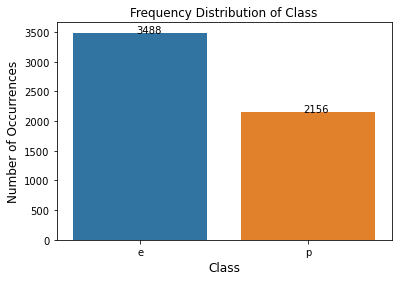

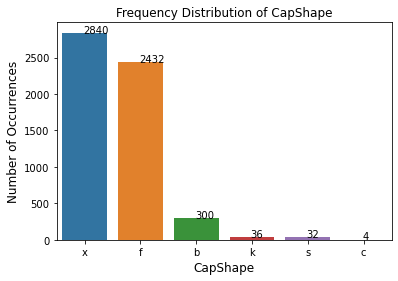

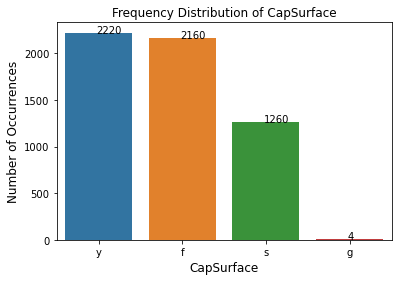

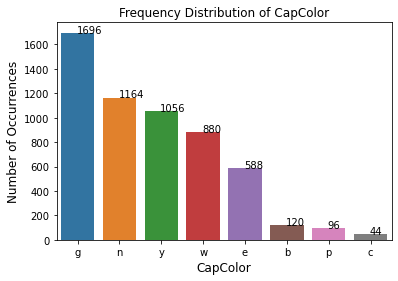

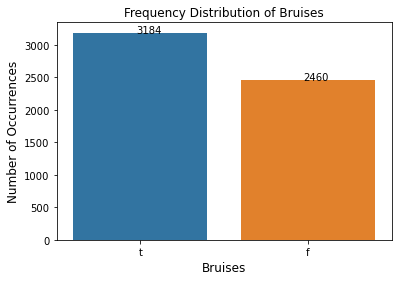

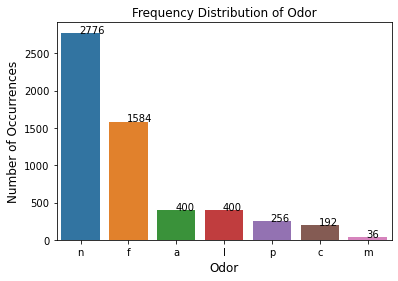

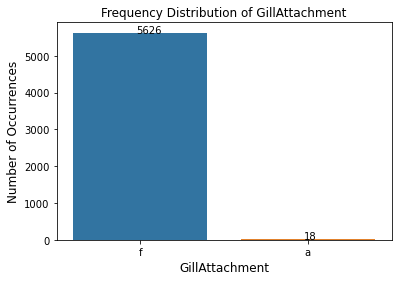

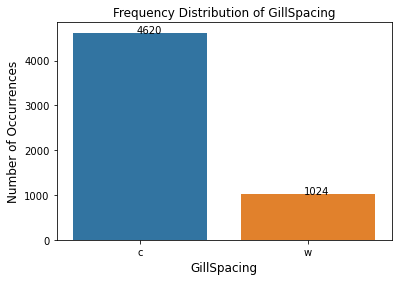

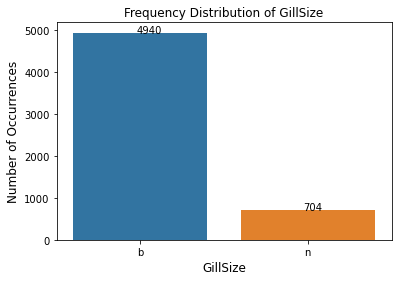

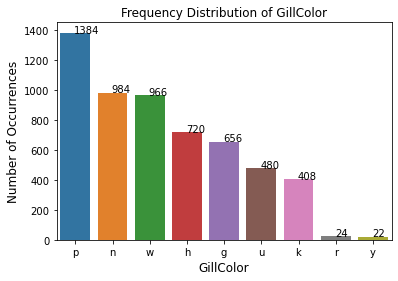

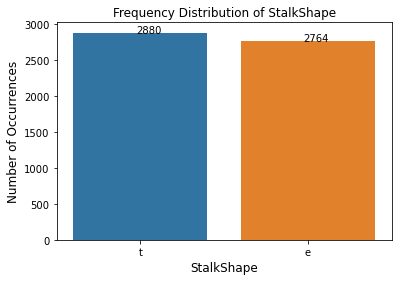

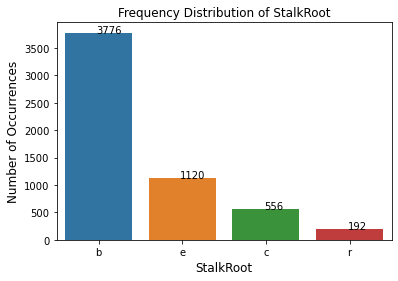

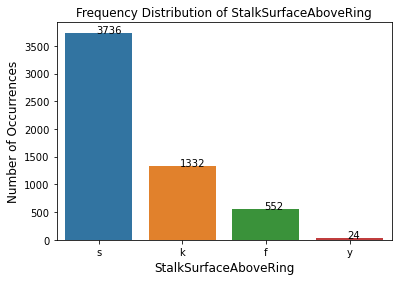

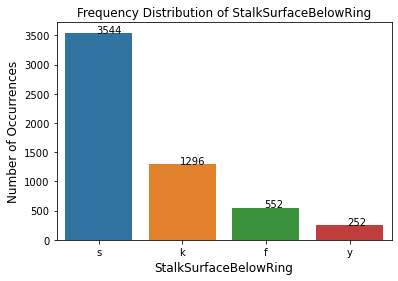

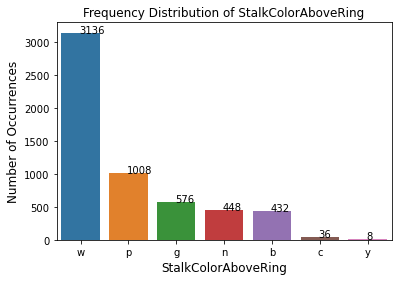

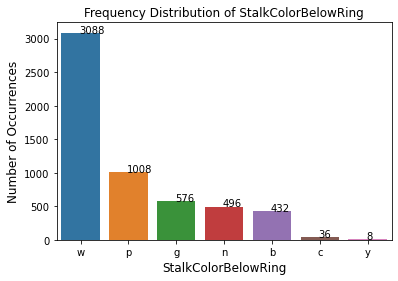

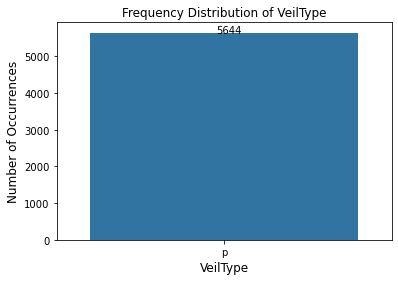

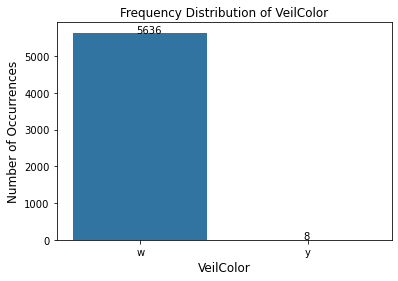

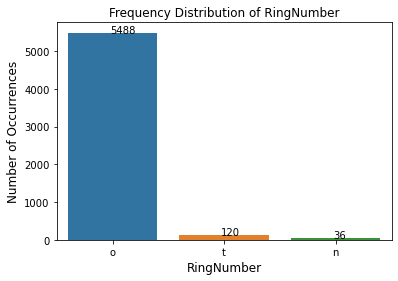

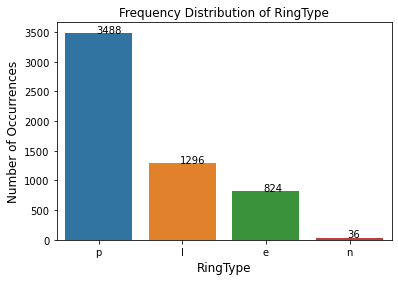

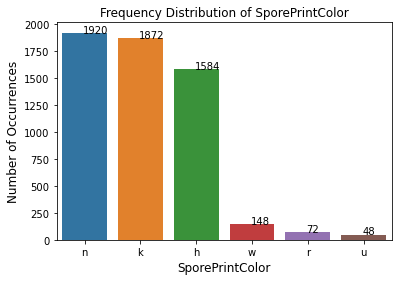

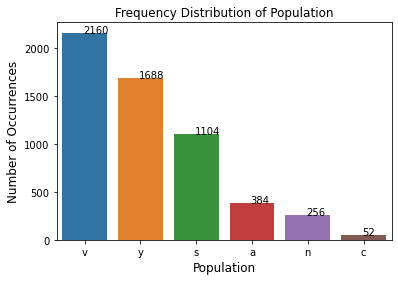

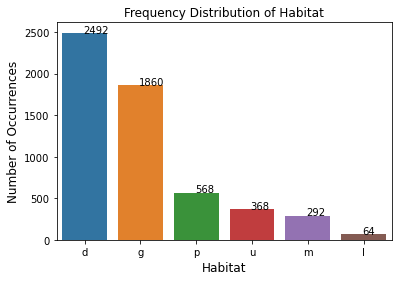

In [10]:
# Plot frequency distributions of columns

for col in  colnames:
    ax = sns.countplot(df_shrooms[col], order = df_shrooms[col].value_counts().index)
    for p, label in zip(ax.patches, df_shrooms[col].value_counts()):
        ax.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

    plt.title('Frequency Distribution of ' + col)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.show()
    

In [11]:
# Encode categorical values in each column distribution to a sequential number 
# note these values are not ordinal but nominal values, so this will not replace encoding, 


df_shrooms_renum= df_shrooms.copy()

for col in col_names:
    df_shrooms[col].value_counts()
    labels = df_shrooms[col].astype('category').cat.categories.tolist()
    replace_map = {col : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
    df_shrooms_renum.replace(replace_map, inplace=True)

    
df_shrooms_renum.head(10)



,Class,CapShape,CapSurface,CapColor,Bruises,Odor,GillAttachment,GillSpacing,GillSize,GillColor,...,StalkSurfaceBelowRing,StalkColorAboveRing,StalkColorBelowRing,VeilType,VeilColor,RingNumber,RingType,SporePrintColor,Population,Habitat
0,2,6,3,5,2,7,2,1,2,3,...,3,6,6,1,1,2,4,2,4,6
1,1,6,3,8,2,1,2,1,1,3,...,3,6,6,1,1,2,4,3,3,2
2,1,1,3,7,2,4,2,1,1,4,...,3,6,6,1,1,2,4,3,3,4
3,2,6,4,7,2,7,2,1,2,4,...,3,6,6,1,1,2,4,2,4,6
4,1,6,3,4,1,6,2,2,1,3,...,3,6,6,1,1,2,1,3,1,2
5,1,6,4,8,2,1,2,1,1,4,...,3,6,6,1,1,2,4,2,3,2
6,1,1,3,7,2,1,2,1,1,1,...,3,6,6,1,1,2,4,2,3,4
7,1,1,4,7,2,4,2,1,1,4,...,3,6,6,1,1,2,4,3,4,4
8,2,6,4,7,2,7,2,1,2,5,...,3,6,6,1,1,2,4,2,5,2
9,1,1,3,8,2,1,2,1,1,1,...,3,6,6,1,1,2,4,2,4,4


In [12]:
#- Frequency distibutions and percents for each dataframe column
# validate renumbering


colnames=df_shrooms_renum.columns

for col in colnames:
    display('------------------------------------')
    display(col)
    display(pd.concat([df_shrooms_renum[col].value_counts(),df_shrooms_renum[col].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage')))
    display()


'------------------------------------'

'Class'

,counts,percentage
1,3488,61.800142
2,2156,38.199858


'------------------------------------'

'CapShape'

,counts,percentage
6,2840,50.318923
3,2432,43.090007
1,300,5.315379
4,36,0.637845
5,32,0.566974
2,4,0.070872


'------------------------------------'

'CapSurface'

,counts,percentage
4,2220,39.333806
1,2160,38.270730
3,1260,22.324592
2,4,0.070872


'------------------------------------'

'CapColor'

,counts,percentage
4,1696,30.049610
5,1164,20.623671
8,1056,18.710135
7,880,15.591779
3,588,10.418143
1,120,2.126152
6,96,1.700921
2,44,0.779589


'------------------------------------'

'Bruises'

,counts,percentage
2,3184,56.413891
1,2460,43.586109


'------------------------------------'

'Odor'

,counts,percentage
6,2776,49.184975
3,1584,28.065202
1,400,7.087172
4,400,7.087172
7,256,4.535790
2,192,3.401843
5,36,0.637845


'------------------------------------'

'GillAttachment'

,counts,percentage
2,5626,99.681077
1,18,0.318923


'------------------------------------'

'GillSpacing'

,counts,percentage
1,4620,81.856839
2,1024,18.143161


'------------------------------------'

'GillSize'

,counts,percentage
1,4940,87.526577
2,704,12.473423


'------------------------------------'

'GillColor'

,counts,percentage
5,1384,24.521616
4,984,17.434444
8,966,17.115521
2,720,12.756910
1,656,11.622962
7,480,8.504607
3,408,7.228916
6,24,0.425230
9,22,0.389794


'------------------------------------'

'StalkShape'

,counts,percentage
2,2880,51.02764
1,2764,48.97236


'------------------------------------'

'StalkRoot'

,counts,percentage
1,3776,66.902906
3,1120,19.844082
2,556,9.851169
4,192,3.401843


'------------------------------------'

'StalkSurfaceAboveRing'

,counts,percentage
3,3736,66.194189
2,1332,23.600283
1,552,9.780298
4,24,0.425230


'------------------------------------'

'StalkSurfaceBelowRing'

,counts,percentage
3,3544,62.792346
2,1296,22.962438
1,552,9.780298
4,252,4.464918


'------------------------------------'

'StalkColorAboveRing'

,counts,percentage
6,3136,55.563430
5,1008,17.859674
3,576,10.205528
4,448,7.937633
1,432,7.654146
2,36,0.637845
7,8,0.141743


'------------------------------------'

'StalkColorBelowRing'

,counts,percentage
6,3088,54.712970
5,1008,17.859674
3,576,10.205528
4,496,8.788094
1,432,7.654146
2,36,0.637845
7,8,0.141743


'------------------------------------'

'VeilType'

,counts,percentage
1,5644,100.0


'------------------------------------'

'VeilColor'

,counts,percentage
1,5636,99.858257
2,8,0.141743


'------------------------------------'

'RingNumber'

,counts,percentage
2,5488,97.236003
3,120,2.126152
1,36,0.637845


'------------------------------------'

'RingType'

,counts,percentage
4,3488,61.800142
2,1296,22.962438
1,824,14.599575
3,36,0.637845


'------------------------------------'

'SporePrintColor'

,counts,percentage
3,1920,34.018427
2,1872,33.167966
1,1584,28.065202
6,148,2.622254
4,72,1.275691
5,48,0.850461


'------------------------------------'

'Population'

,counts,percentage
5,2160,38.270730
6,1688,29.907867
4,1104,19.560595
1,384,6.803685
3,256,4.535790
2,52,0.921332


'------------------------------------'

'Habitat'

,counts,percentage
1,2492,44.153083
2,1860,32.955351
5,568,10.063785
6,368,6.520198
4,292,5.173636
3,64,1.133948


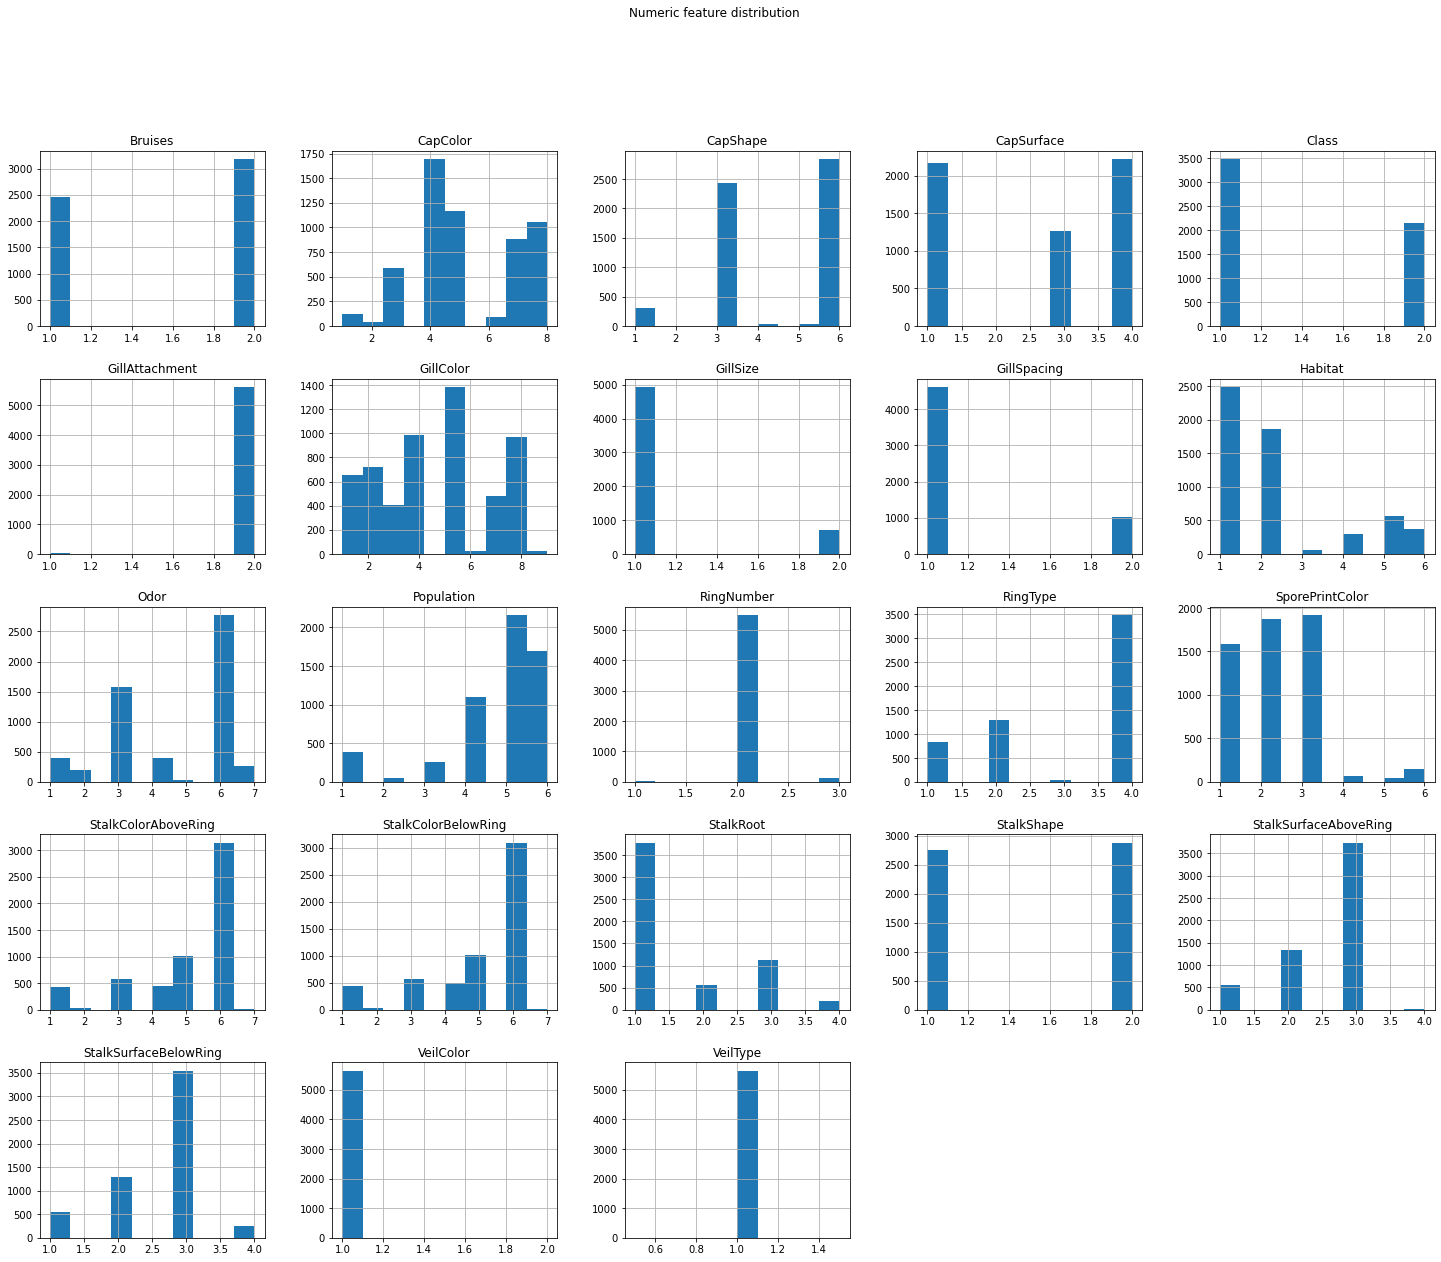

In [13]:
# Now you can use a histogram plot based on encoded numeric values

df_shrooms_renum.hist(figsize=[25,20])
plt.suptitle("Numeric feature distribution")
plt.show()

## Feature Selection

> #### Feature importance scores can provide insight into the dataset.
> #### Feature importance scores can provide insight into the model.
> #### Feature importance can be used to improve a predictive model.

In [15]:
# logistic regression for feature importance

# define dataset
# define the model
# fit the model
# get importance
# summarize feature importance
# plot feature importance

# Feature importance from model coefficients.

In [16]:
# Isolate Predicted variable (Class)

# more training examples for edible mushrooms versus poisonous ones. 
# Correct imbalance when training and evaluating the classifier.

# create y dataframe
y = df_shrooms['Class'].to_frame()
display(pd.concat([df_shrooms['Class'].value_counts(),df_shrooms['Class'].value_counts(normalize=True).mul(100)],axis=1, keys=('counts','percentage')))
y.head()


,counts,percentage
e,3488,61.800142
p,2156,38.199858


,Class
0,p
1,e
2,e
3,p
4,e


In [17]:
#- Create X variables (features)

X = df_shrooms.loc[:, df_shrooms.columns != 'Class']
X.describe(include = 'object').T 


,count,unique,top,freq
CapShape,5644,6,x,2840
CapSurface,5644,4,y,2220
CapColor,5644,8,g,1696
Bruises,5644,2,t,3184
Odor,5644,7,n,2776
GillAttachment,5644,2,f,5626
GillSpacing,5644,2,c,4620
GillSize,5644,2,b,4940
GillColor,5644,9,p,1384
StalkShape,5644,2,t,2880


In [18]:
# One Hot Encode categorical values using get_dummies
# classifiers require categorical values be converted to numbers


X_enc = pd.get_dummies(X)

display(X_enc.columns.tolist())
X_enc.shape


['CapShape_b',
 'CapShape_c',
 'CapShape_f',
 'CapShape_k',
 'CapShape_s',
 'CapShape_x',
 'CapSurface_f',
 'CapSurface_g',
 'CapSurface_s',
 'CapSurface_y',
 'CapColor_b',
 'CapColor_c',
 'CapColor_e',
 'CapColor_g',
 'CapColor_n',
 'CapColor_p',
 'CapColor_w',
 'CapColor_y',
 'Bruises_f',
 'Bruises_t',
 'Odor_a',
 'Odor_c',
 'Odor_f',
 'Odor_l',
 'Odor_m',
 'Odor_n',
 'Odor_p',
 'GillAttachment_a',
 'GillAttachment_f',
 'GillSpacing_c',
 'GillSpacing_w',
 'GillSize_b',
 'GillSize_n',
 'GillColor_g',
 'GillColor_h',
 'GillColor_k',
 'GillColor_n',
 'GillColor_p',
 'GillColor_r',
 'GillColor_u',
 'GillColor_w',
 'GillColor_y',
 'StalkShape_e',
 'StalkShape_t',
 'StalkRoot_b',
 'StalkRoot_c',
 'StalkRoot_e',
 'StalkRoot_r',
 'StalkSurfaceAboveRing_f',
 'StalkSurfaceAboveRing_k',
 'StalkSurfaceAboveRing_s',
 'StalkSurfaceAboveRing_y',
 'StalkSurfaceBelowRing_f',
 'StalkSurfaceBelowRing_k',
 'StalkSurfaceBelowRing_s',
 'StalkSurfaceBelowRing_y',
 'StalkColorAboveRing_b',
 'StalkColorAbove

(5644, 98)

In [19]:
# Standardize the Encoded Dataframe
# review distributions above and notice scaling differences across independent variables

scaler = StandardScaler()
X_std = scaler.fit_transform(X_enc)
X_std.shape

X_std

array([[-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
        -0.33451328,  3.78641737],
       [-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
        -0.33451328, -0.26410189],
       [ 4.22058448, -0.02663118, -0.87014978, ...,  4.28121094,
        -0.33451328, -0.26410189],
       ...,
       [-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
         2.98941796, -0.26410189],
       [-0.23693401, -0.02663118, -0.87014978, ..., -0.23357877,
        -0.33451328, -0.26410189],
       [-0.23693401, -0.02663118,  1.14922743, ..., -0.23357877,
        -0.33451328, -0.26410189]])

In [20]:
# Encode Y variable
# Returns a contiguous flattened array. A 1-D array, containing the elements of the input

le = preprocessing.LabelEncoder()
y_enc = le.fit_transform(y.values.ravel())
y_enc

array([1, 0, 0, ..., 0, 1, 1])

In [21]:
# Create Train Test datasets (arrays)  (using 80 train - 20 test split)

X_train, X_test, y_train, y_test = train_test_split(
    X_std,
    y_enc,
    test_size=0.2,
    stratify=y_enc,     # this parameter stratifies the target variable to maintain base distribution 
    random_state=42    
)

# review array shapes
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(4515, 98)

(1129, 98)

(4515,)

(1129,)

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X= X_enc
num_feats= 10

X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

chi_feature

10 selected features


['Odor_f',
 'Odor_n',
 'StalkShape_e',
 'StalkShape_t',
 'StalkSurfaceAboveRing_k',
 'StalkSurfaceBelowRing_k',
 'StalkColorAboveRing_b',
 'StalkColorBelowRing_b',
 'RingType_l',
 'SporePrintColor_h']

https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html

{0: 698, 1: 431}

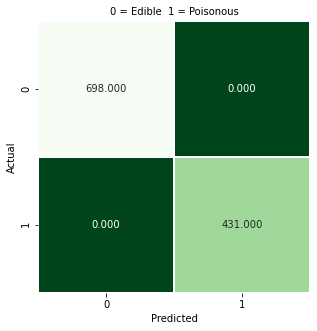

In [23]:
# train Logistic regression algorithm
# When making a prediction for a binary or two-class classification problem, 
# there are two types of errors that we could make.
# False Positive. Predict an event when there was no event.
# False Negative. Predict no event when in fact there was an event.

# Compute the F1 score, also known as balanced F-score or F-measure
# The F1 score can be interpreted as a weighted average of the precision 
# and recall, where an F1 score reaches its best value at 1 and worst score at 0.

# display y_test_values
unique, counts = np.unique(y_test, return_counts=True)
display(dict(zip(unique, counts)))

# train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
# compute F1 score
f1_score(y_test, y_pred)

# create a confusion mastrix
cm= confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r', cbar = False);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('0 = Edible  1 = Poisonous', size = 10)
plt.show()

In [24]:
# show test to predicted values
df_lrout = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_lrout



,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
1124,0,0
1125,0,0
1126,0,0
1127,0,0


In [25]:
#- Using nested cross-validation to evaluate performance

# One downside to using nested cross-validation is how computationally intensive it can be. 

# The outer loop splits the data into training/test folds using 10-fold cross-validation 
# and reports model performance. 

# while the inner loop performs a grid search on each training fold of the outer loop 
# to tune the hyperparameter with 10-fold cross-validation. In addition, each grid search 
# tests 10 hyperparameter values. That means we've just trained 1000 models! 
# Fortunately, n_jobs=-1 parallelizes the operations across all CPU cores and speeds
# up the computation considerably. 

# "C" is a hyperparameter is a parameter whose value is used to control the learning process.

# Witnessing how consistent the performance is, we can now conclude the model is indeed performing
# well and not overfitting.


# run cross-validation using grid_search, StratifiedShuffleSplit using logistic regression
param_grid = [{'C': np.logspace(-3, 3, 10)}]

grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42),
    scoring='f1',
    n_jobs=-1
)

scores = cross_val_score(
    estimator=grid_search,
    X=X_std,
    y=y_enc,
    cv=StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0),
    scoring='f1',
    n_jobs=-1
)


# evaluation scores
display(scores)
display(scores.mean())



array([1.        , 0.99767442, 1.        , 1.        , 0.99767442,
       1.        , 1.        , 1.        , 1.        , 1.        ])

0.9995348837209302

## logistic regression coefficients for feature importance  - grid_search()

In [26]:
# Grid search is essentially an optimization algorithm which lets you select the
# best parameters for your optimization problem from a list of parameter options
# that you provide, hence automating the 'trial-and-error' method. Although it 
# can be applied to many optimization problems, but it is most popularly known 
# for its use in machine learning to obtain the parameters at which the model 
# gives the best accuracy.

grid_search.fit(X_std, y_enc)
grid_search.best_params_

{'C': 0.1}

In [27]:
# Remember that we use paramter C as our regularization parameter. Parameter C = 1/λ.
# Parameter C will work the other way around. For small values of C, we increase the 
# regularization strength which will create simple models which underfit the data. 
# For big values of C, we lower the power of regularization which implies the model is 
# allowed to increase it's complexity, and therefore, overfit the data.


final_logreg = LogisticRegression(C=0.1)
final_logreg.fit(X_std, y_enc)

display("Coefficients", logreg.coef_)
display("Intercept", logreg.intercept_)
display("Classes", logreg.classes_)

'Coefficients'

array([[ 1.95215236e-03,  8.44622105e-02, -4.34890807e-03,
        -5.86104896e-02, -1.68121454e-01,  3.35149026e-02,
        -3.12586293e-01,  9.91752870e-02,  3.41892373e-01,
         1.41683722e-02,  3.04963921e-01, -1.22301137e-01,
        -2.09540838e-01,  5.92474719e-02, -1.56028978e-01,
         1.73677010e-01,  2.15016818e-01, -8.64546525e-02,
        -6.75483064e-02,  6.75483064e-02, -7.83759576e-01,
         1.30650555e+00,  1.23289953e+00, -7.90689197e-01,
         1.12622187e-01, -1.42004064e+00,  1.50983175e+00,
         3.21115641e-02, -3.21115641e-02,  2.11254549e-01,
        -2.11254549e-01, -3.38996913e-01,  3.38996913e-01,
         2.05036681e-02,  2.23539314e-01, -9.43047250e-02,
        -1.28523334e-01,  2.21747898e-02,  1.21601974e-01,
        -5.49638748e-02, -3.64456567e-02,  5.84880485e-02,
         4.19360933e-01, -4.19360933e-01,  6.85438418e-01,
        -6.39929559e-01, -2.18304788e-01, -2.46991310e-01,
        -6.83191669e-05,  4.40041257e-01, -3.85887487e-0

'Intercept'

array([-2.14926228])

'Classes'

array([0, 1])

In [28]:
#- report the five features that are most strongly correlated with class

feature_ranks = pd.DataFrame(final_logreg.coef_, index=['parameter value'])
feature_ranks.columns = X_enc.columns
feature_ranks.sort_values('parameter value', axis=1, ascending=False).T.head()

,parameter value
Odor_p,1.054689
Odor_f,0.902922
SporePrintColor_h,0.902922
Odor_c,0.899524
SporePrintColor_r,0.585103


In [29]:
feature_ranks.sort_values('parameter value', axis=1, ascending=True).T.head()


,parameter value
Odor_n,-1.025776
Odor_l,-0.550029
Odor_a,-0.550029
StalkRoot_c,-0.467588
SporePrintColor_n,-0.447512


http://drorata.github.io/posts/2017/Mar/31/mushrooms-and-decision-trees/index.html

https://gust.dev/r/xgboost-agaricus

https://www.kaggle.com/turksoyomer/classification-methods-on-mushroom-dataset

https://www.kaggle.com/haimfeld87/analysis-and-classification-of-mushrooms


## Feature selection using WOE - IV


https://www.listendata.com/2015/03/weight-of-evidence-woe-and-information.html

https://www.kaggle.com/davidbnn92/weight-of-evidence-encoding

#### The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable.

#### Positive WOE means Distribution of Event > Non Events
#### Negative WOE means Distribution of Non Events < Event 
####    
> #### For a categorical variable, you do not need to split the data (use dummies)
> #### for each unique value 𝑥, features
> #### consider the corresponding rows in the training set
> #### compute what percentage of positives is in these rows, compared to the whole set
> #### compute what percentage of negatives is in these rows, compared to the whole set
> #### take the ratio of these percentages
> #### take the natural logarithm of that ratio to get the weight of evidence corresponding to 𝑥,
> #### so that 𝑊𝑂𝐸(𝑥) is either positive or negative according to whether 𝑥
> #### is more representative of positives or negatives
> #### NaN's are set to have WOE=0, or according to the handle_missing option

,CapShape,poisonous,poisonous_0,all_cat_val,p0_tot,p1_tot,event,non_event,WOE,IV,IV_tot
0,b,40,260,300,3488,2156,0.018553,0.074541,-1.390728,-0.077865,-0.082397
1,c,4,0,4,3488,2156,0.001855,0.000000,0.000000,-0.000000,-0.082397
2,f,972,1460,2432,3488,2156,0.450835,0.418578,0.074238,-0.002395,-0.082397
3,k,16,20,36,3488,2156,0.007421,0.005734,0.257930,-0.000435,-0.082397
4,s,0,32,32,3488,2156,0.000000,0.009174,0.000000,0.000000,-0.082397
5,x,1124,1716,2840,3488,2156,0.521336,0.491972,0.057972,-0.001702,-0.082397


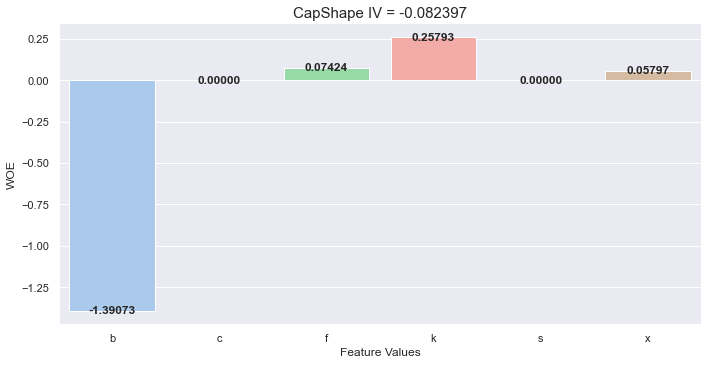

In [30]:
# create WOE % IV for a single categorical column for all domain values 

# create dataframe for categorical column and create count column
df_woe= df_shrooms.copy()
df_woe['poisonous']= np.where(df_woe['Class'] == 'p',1,0)
df_woe['poisonous_1']= np.where(df_woe['Class'] == 'p',1,0)
df_woe['poisonous_0']= np.where(df_woe['Class'] == 'e',1,0)

feature='CapShape'
woe_col= df_woe[[feature, 'poisonous', 'poisonous_0']]

# summaraize categorical values within the column using pivot_table
# Use double brackets after the groupby method. Single brackets are 
# used to output a Pandas Series and double brackets are used to output a Pandas DataFrame.

woe_iv= woe_col.groupby(feature)[['poisonous', 'poisonous_0']].sum().reset_index()
# display(woe_iv)

# drop rows with a zero value
# woe_iv= woe_iv[(woe_iv != 0).all(1)]
# display(woe_iv)

# Add and calculate WOE and IV columns
woe_iv['all_cat_val']= woe_iv['poisonous'] + woe_iv['poisonous_0']
woe_iv['p0_tot']= woe_iv['poisonous_0'].sum()
woe_iv['p1_tot']= woe_iv['poisonous'].sum() 
woe_iv['event']= woe_iv['poisonous'].divide(woe_iv['p1_tot'])
woe_iv['non_event']= woe_iv['poisonous_0'].divide(woe_iv['p0_tot'])
woe_iv['WOE']= np.log(woe_iv['event'] / woe_iv['non_event'])
woe_iv['WOE'].replace((np.inf,-np.inf),0,inplace=True)
woe_iv['IV']= (woe_iv['non_event'] - woe_iv['event']) * woe_iv['WOE']
woe_iv['IV_tot']= woe_iv['IV'].sum()

display(woe_iv)

# Plot woe table
woe_iv
woe_df= woe_iv[['CapShape', 'WOE','IV']]
cols= woe_df.columns.tolist()

sns.set(style="darkgrid", palette="pastel", context='notebook')
woe_plot= sns.catplot(data=woe_df, x=cols[0], y='WOE', kind='bar', height=5, aspect=2, ci= None)

# add data labels to the bars
for i, bar in enumerate(woe_plot.ax.patches):
    h = bar.get_height()
    woe_plot.ax.text(i, h, '{:,.5f}'.format(h), ha='center', va='center', fontweight='bold', size=12)
    
# Add asethetics
plt.title(cols[0] + ' IV = ' + str(   '{:,.6f}'.format(woe_df['IV'].sum()) ), fontsize= 15)
plt.xlabel('Feature Values', fontsize= 12)
plt.ylabel("WOE", fontsize= 12)    
plt.show()

fig = plt.gcf()
fig.set_size_inches(8,5)
plt.close(fig)

In [31]:
#  function to create IV for all features with chart and table 

def calc_cat_iv_all(df, feature, target, tbl:0, plot:0, IVonly:1):

    # create input dataframe for a given feature
    woe_iv= df.groupby(feature)[['poisonous', 'poisonous_0']].sum().reset_index()
    
    # Add and calculate WOE and IV columns
    woe_iv['all_cat_val']= woe_iv['poisonous'] + woe_iv['poisonous_0']
    woe_iv['p0_tot']= woe_iv['poisonous_0'].sum()
    woe_iv['p1_tot']= woe_iv['poisonous'].sum() 
    woe_iv['event']= woe_iv['poisonous'].divide(woe_iv['p1_tot'])
    woe_iv['non_event']= woe_iv['poisonous_0'].divide(woe_iv['p0_tot'])
    woe_iv['WOE']= np.log(woe_iv['event'].divide(woe_iv['non_event'])) 
    woe_iv['WOE'].replace((np.inf,-np.inf),0,inplace=True)
    woe_iv['IV']= (woe_iv['non_event'] - woe_iv['event']) * woe_iv['WOE']
    woe_iv['IV_tot']= woe_iv['IV'].sum()
        
    # Plot WOE table
    if plot==1:
        
        woe_df= woe_iv[[feature, 'WOE','IV']]
        sns.set(style="darkgrid", palette="pastel", context='notebook')

        woe_plot= sns.catplot(data=woe_df, x=feature, y='WOE', kind='bar', height=5, aspect=2, ci= None)

        # add data labels to the bars
        for i, bar in enumerate(woe_plot.ax.patches):
            h = bar.get_height()
            woe_plot.ax.text(i, h, '{:,.5f}'.format(h), ha='center', va='center', fontweight='bold', size=12)

        # Add asethetics
        plt.title('_____________________________\n\n' + feature + ' IV = ' + str(   '{:,.6f}\n'.format(woe_df['IV'].sum()) ), fontsize= 14)
        plt.xlabel('Feature Values', fontsize= 12)
        plt.ylabel("WOE", fontsize= 12)    
        plt.show()
        
        fig = plt.gcf()
        fig.set_size_inches(8,5)    
        plt.close(fig)

    # write results to dictionary dResults
    dResults[feature] = (woe_iv['IV'].sum(), woe_iv['poisonous'].sum() , woe_iv['poisonous_0'].sum())
    
    # display woe_iv table
    if tbl==1:
        display(woe_iv)
        


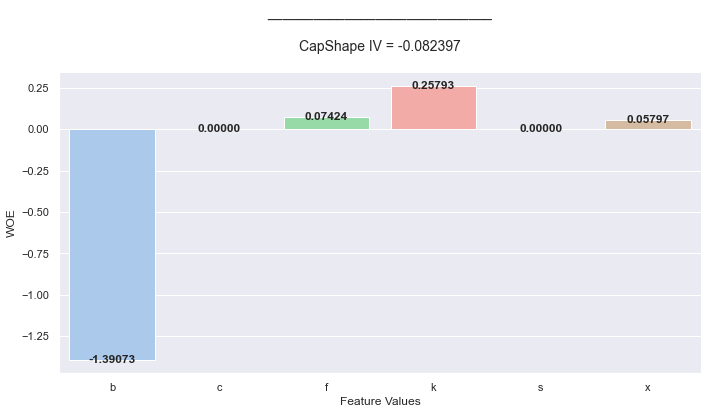

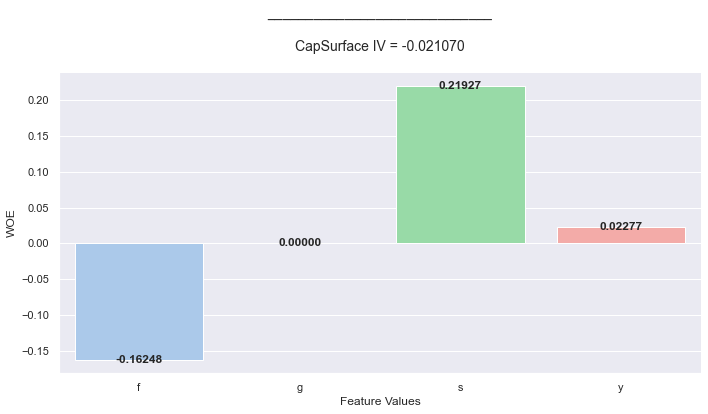

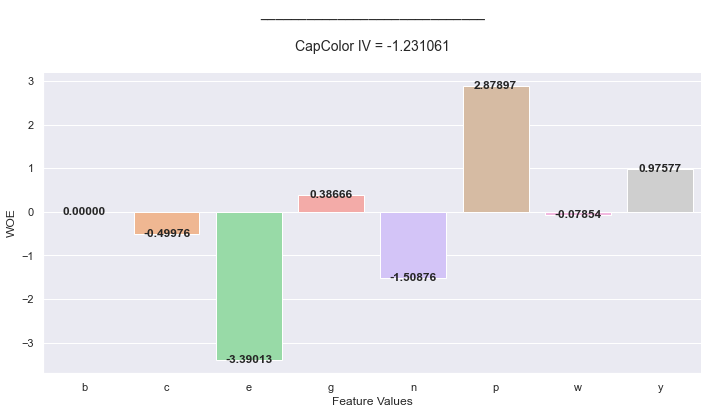

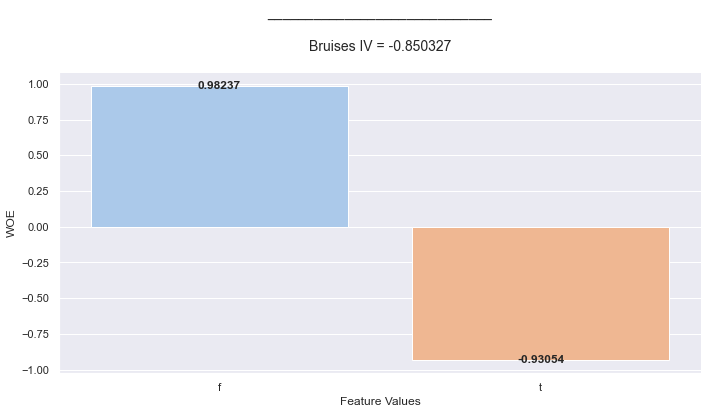

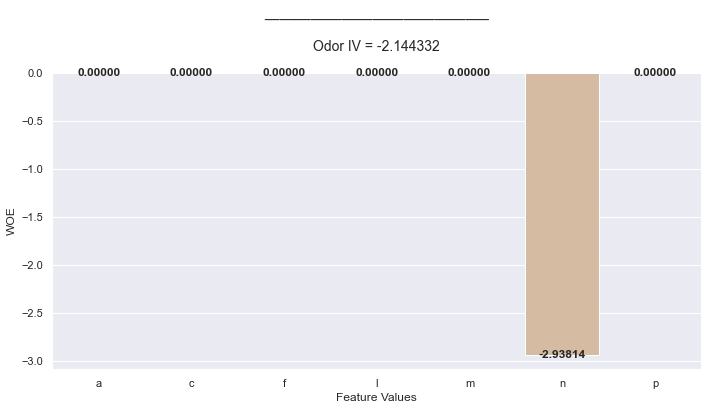

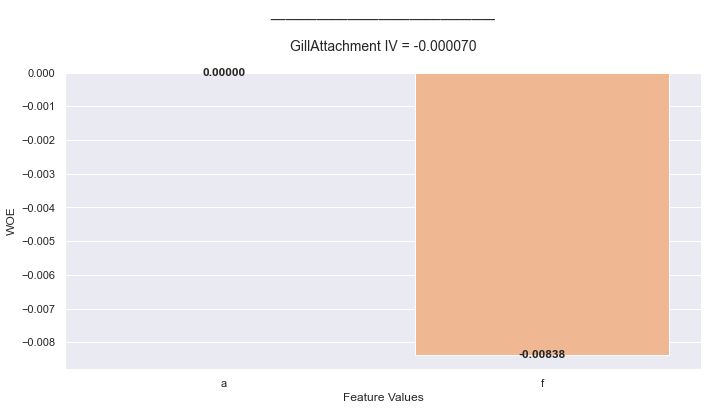

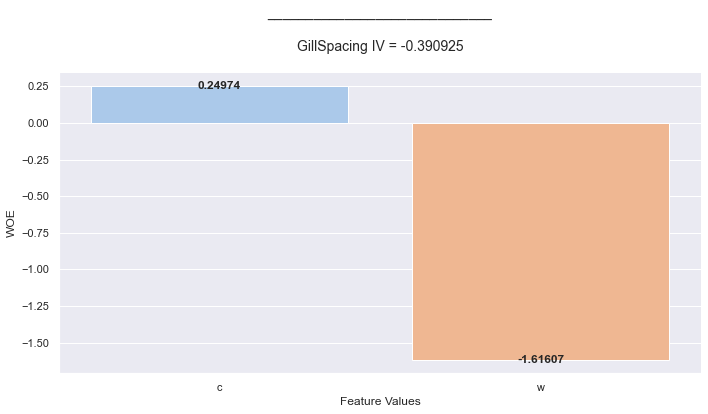

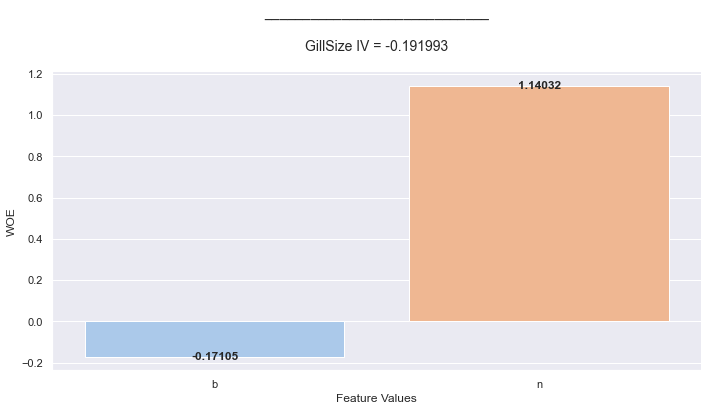

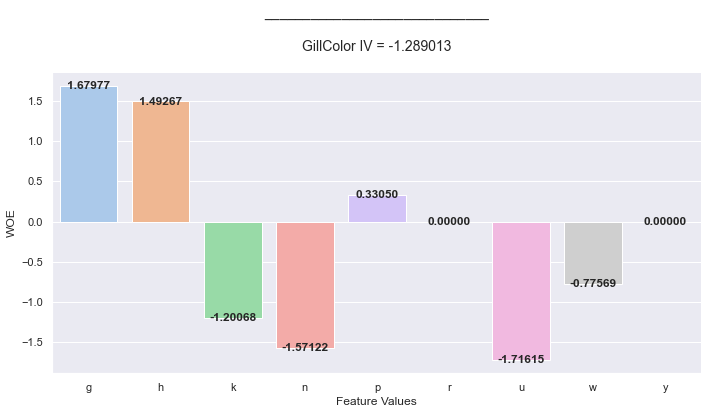

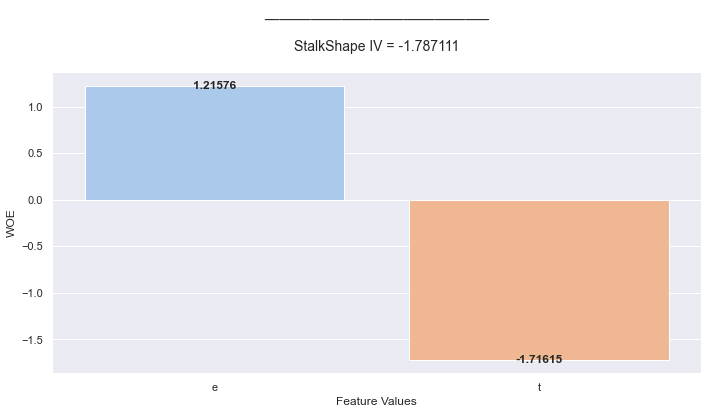

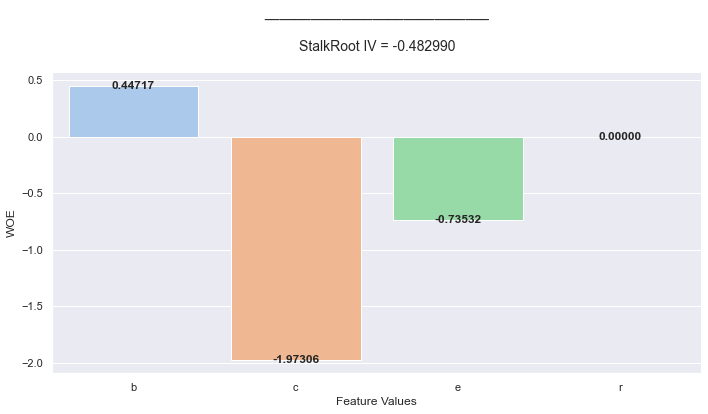

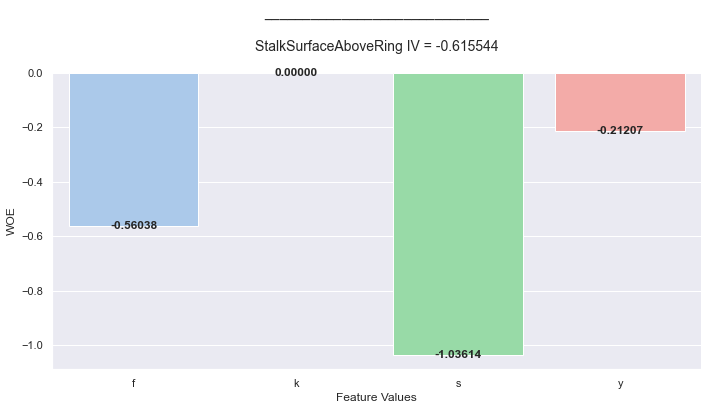

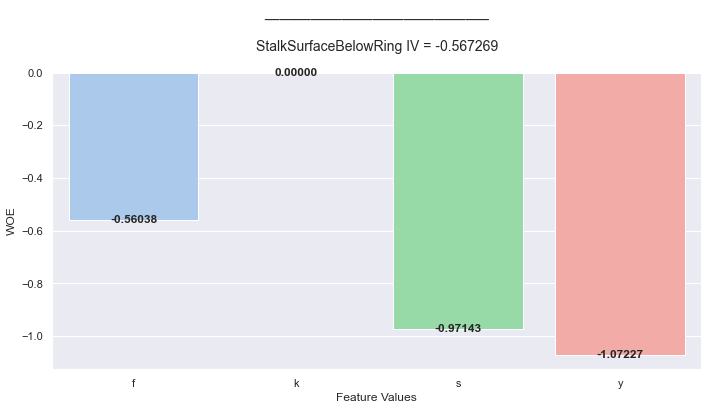

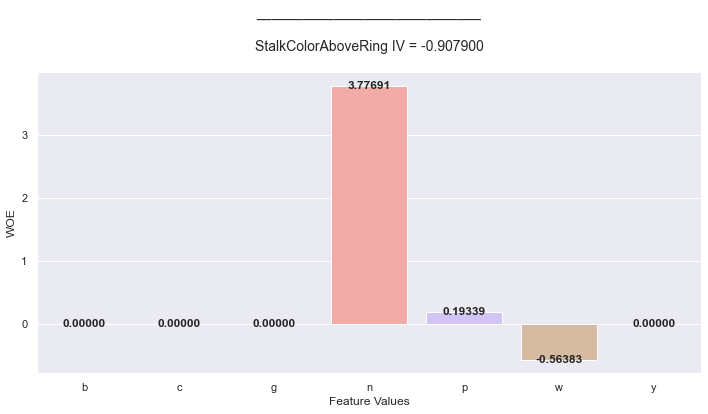

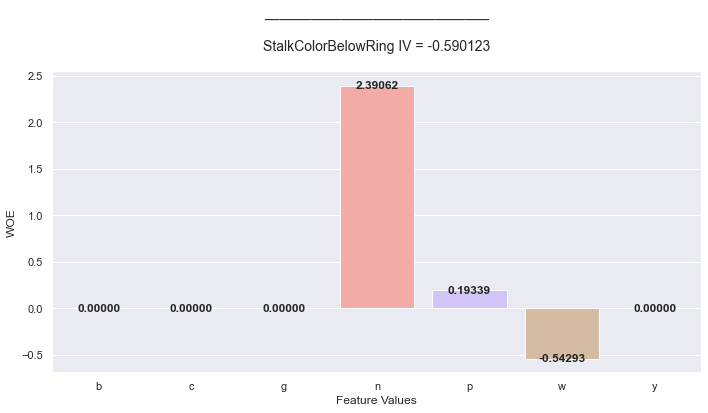

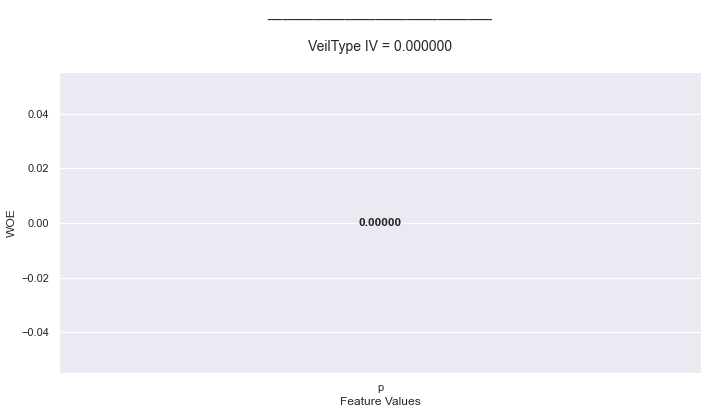

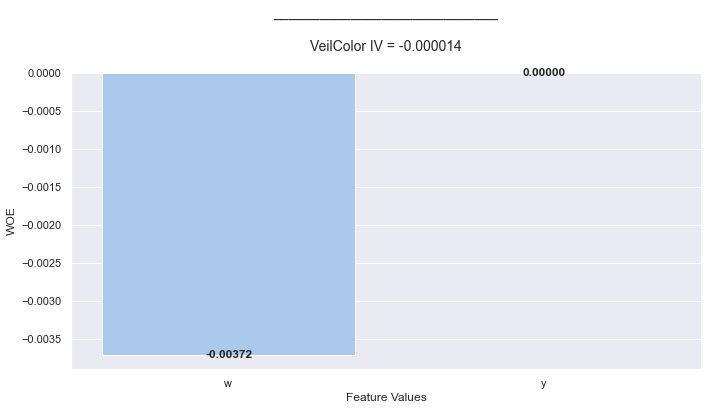

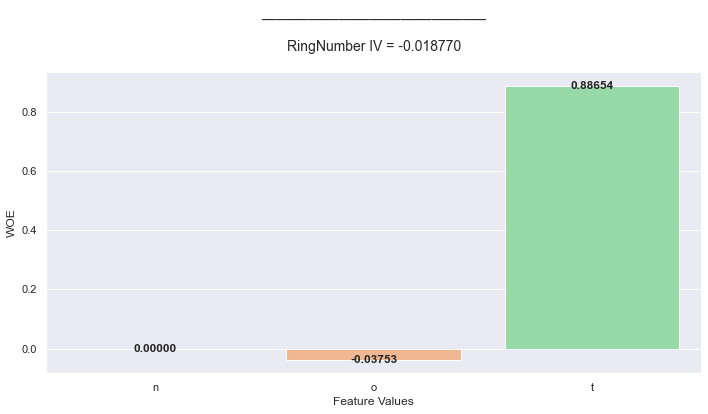

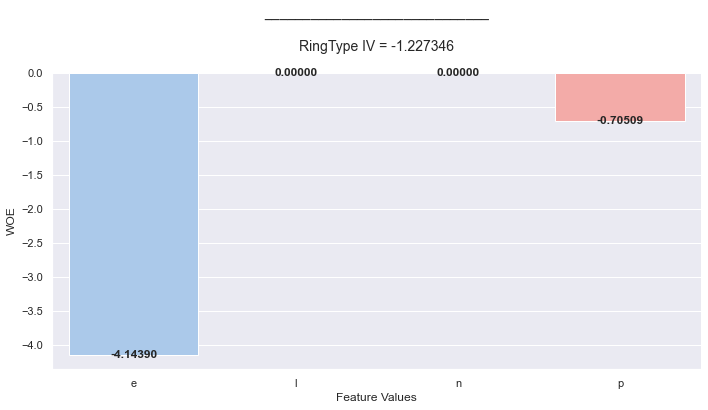

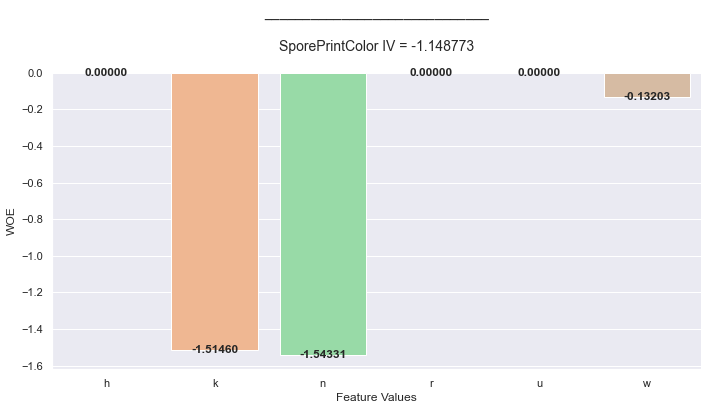

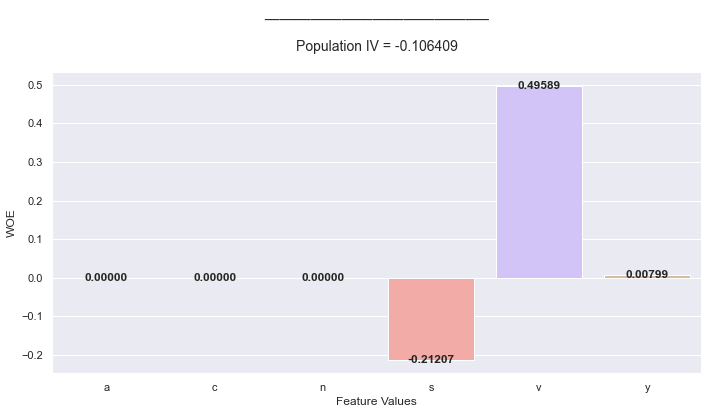

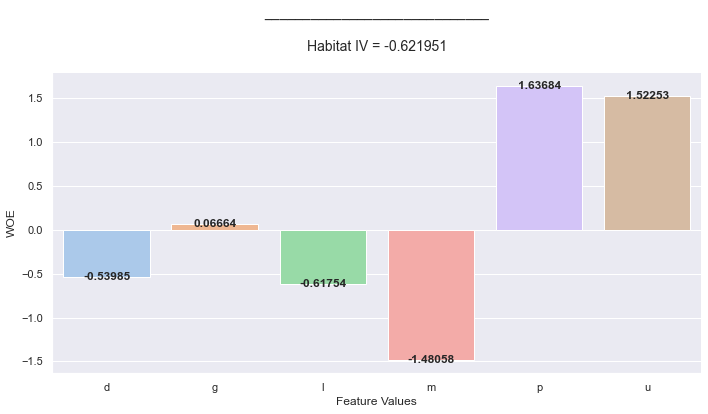

{'feature': ('iv', 'event', 'non-event'),
 'CapShape': (-0.08239677222826952, 2156, 3488),
 'CapSurface': (-0.021069579221431732, 2156, 3488),
 'CapColor': (-1.231060671587274, 2156, 3488),
 'Bruises': (-0.8503268367743386, 2156, 3488),
 'Odor': (-2.1443320818525726, 2156, 3488),
 'GillAttachment': (-6.999495732381704e-05, 2156, 3488),
 'GillSpacing': (-0.39092462431693026, 2156, 3488),
 'GillSize': (-0.19199301551772918, 2156, 3488),
 'GillColor': (-1.2890133262477474, 2156, 3488),
 'StalkShape': (-1.7871108512601896, 2156, 3488),
 'StalkRoot': (-0.48298997167241686, 2156, 3488),
 'StalkSurfaceAboveRing': (-0.6155438922253298, 2156, 3488),
 'StalkSurfaceBelowRing': (-0.5672685121124033, 2156, 3488),
 'StalkColorAboveRing': (-0.9079003108922746, 2156, 3488),
 'StalkColorBelowRing': (-0.5901232332531182, 2156, 3488),
 'VeilType': (0.0, 2156, 3488),
 'VeilColor': (-1.3793975510695265e-05, 2156, 3488),
 'RingNumber': (-0.01876970307078786, 2156, 3488),
 'RingType': (-1.2273459115970076, 2

In [32]:
# create IV value for all columns in dataframe df_woe 
# utilizes woe_iv calc function calc_cat_iv_all(df, feature, target, tbl, plot, IVonly)

# You must specify as function parameters: 
# a dataframe of features with feature name and event & non event count for each domain value
# the regression model target
# feature name
# show woe tbl details 
# show woe - IV plots
# show summary IV listing


# Create dictionary for results
dResults= {}
dResults['feature'] = ('iv', 'event', 'non-event')

#- create dataframe for categorical features 
df_woe= df_shrooms.copy()
df_woe['poisonous']= np.where(df_woe['Class'] == 'p',1,0)
df_woe['poisonous_0']= np.where(df_woe['Class'] == 'e',1,0)

#- create list of columns
cols= df_woe.columns.tolist()

#- remove target variables from list
cols.remove('Class')
cols.remove('poisonous')
cols.remove('poisonous_0')

##------------------------------
#- function parameters
##------------------------------
df= woe_iv
target= 'poisonous'
tbl=0    # 1= display woe tbl 
plot=1   # 1= display woe plots 
IVonly=1 # != display dResults
##------------------------------

# loop to calculate IV for all columns in df_woe
for feature in cols:

    # create woe_iv dataframe for a feature
    woe_col= df_woe[[feature, 'poisonous','poisonous_0']]
    woe_iv= woe_col.groupby(feature)[['poisonous','poisonous_0']].sum().reset_index()    
    
    # Calculate IV for feature (variable function parameters)
    df= woe_iv
    feature= feature
    
    # execute function
    calc_cat_iv_all(df, feature, target, tbl, plot, IVonly)
        
# display dResults
if IVonly==1:
    display(dResults)



In [33]:
# convert results dictionary to a dataframe
# select top 10 IVs

dfResults= pd.DataFrame(dResults).T
dfResults.reset_index(level=0, inplace=True)
dfResults.columns= ['Feature','IV','Event','NonEvent']
dfResults = dfResults.drop(0)
dfResults['IV'] = pd.to_numeric(dfResults['IV'],errors='coerce')
dfResults['Event']= dfResults['Event'].astype('int64')
dfResults['NonEvent']= dfResults['NonEvent'].astype('int64')
dfResults.sort_values("IV", inplace=True, ascending=True)

display("Top Features")
display(dfResults.head(5))
display("")
display("Bottom Features")
display(dfResults.tail(5))

'Top Features'

,Feature,IV,Event,NonEvent
5,Odor,-2.144332,2156,3488
10,StalkShape,-1.787111,2156,3488
9,GillColor,-1.289013,2156,3488
3,CapColor,-1.231061,2156,3488
19,RingType,-1.227346,2156,3488


''

'Bottom Features'

,Feature,IV,Event,NonEvent
2,CapSurface,-0.021070,2156,3488
18,RingNumber,-0.018770,2156,3488
6,GillAttachment,-0.000070,2156,3488
17,VeilColor,-0.000014,2156,3488
16,VeilType,0.000000,2156,3488


### Under Construction

### AUC & ROC  

> #### It is a plot of the false positive rate (x-axis) versus the true positive rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. Put another way, it plots the false alarm rate versus the hit rate.
> #### When we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). 
> #### A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average.
> #### A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5).

https://www.listendata.com/2014/08/learn-area-under-curve-auc.html

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/